In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from  neural.nn import NeuralNetwork
from  neural.layers import ActivationLayer, DenseLayer, DropoutLayer, BatchNormalization
from  neural.losses import MSE,  BinaryCrossentropy, CategoricalCrossentropy
from neural.activations import Tanh
from neural.metrics import Metrics

## XNOR Gate

In [2]:
# training data
x_train = np.array([[0,0], [0,1], [1,0], [1,1]])
y_train = np.array([[0], [1], [1], [0]])


# network
net = NeuralNetwork()

net.add(DenseLayer(2, 8, bias=False))
net.add(ActivationLayer(Tanh))

net.add(DenseLayer(8, 4, activation="tanh"))

net.add(DenseLayer(4, 1, activation="sigmoid"))                    # input_shape=(1, 10)       ;   output_shape=(1, 10)
# net.add(ActivationLayer(Sigmoid))

# net.use_loss(MSE_loss)
net.use_loss(BinaryCrossentropy())


In [3]:
net.summary()

Summary of the Neural Network
___________________________________________________________________________________________________________________
Layer (type)        Neurons #      Input Shape    Output Shape   Weights shape  Bias shape        Param #
Input               2              -              (2, None)      -              -                       0

DenseLayer          8              (2, None)      (8, None)      (8, 2)         0                      24

ActivationLayer     -              activavtion    Tanh           -              -                       0

DenseLayer          4              (8, None)      (4, None)      (4, 8)         (4, 1)                 36

DenseLayer          1              (4, None)      (1, None)      (1, 4)         (1, 1)                  5

Total params                                                                                           65


In [4]:
net.fit(x_train, y_train, epochs=50, learning_rate=0.9, verbose=1)

# test
out = net.predict(x_train)
print(out)

Epoch 1-50 ======================> cost: 0.6833
Epoch 11-50 ======================> cost: 0.5773
Epoch 21-50 ======================> cost: 0.3233
Epoch 31-50 ======================> cost: 0.1603
Epoch 41-50 ======================> cost: 0.0990
[[0.0690207 ]
 [0.94285877]
 [0.94954375]
 [0.10257768]]


In [5]:
xor_pred = np.round(out)

Metrics.accuracy(y_train, xor_pred)

1.0

## Breast Cancer

In [6]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

data_df = pd.DataFrame(data = data.data,
                       columns = data.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
breast_net = NeuralNetwork()

breast_net.add(DenseLayer(30, 64, activation="tanh"))
# breast_net.add(ActivationLayer(Tanh))

breast_net.add(DenseLayer(64, 128, activation="tanh"))
# breast_net.add(ActivationLayer(Tanh))

breast_net.add(DropoutLayer(0.2))

breast_net.add(DenseLayer(128, 32, activation="tanh"))                    # input_shape=(1, 10)       ;   output_shape=(1, 10)
# breast_net.add(ActivationLayer(Tanh))

breast_net.add(DenseLayer(32, 1, activation="sigmoid"))                    # input_shape=(1, 10)       ;   output_shape=(1, 10)
# breast_net.add(ActivationLayer(Sigmoid))

breast_net.use_loss(BinaryCrossentropy())

breast_net.summary()

Summary of the Neural Network
___________________________________________________________________________________________________________________
Layer (type)        Neurons #      Input Shape    Output Shape   Weights shape  Bias shape        Param #
Input               30             -              (30, None)     -              -                       0

DenseLayer          64             (30, None)     (64, None)     (64, 30)       (64, 1)              1984

DenseLayer          128            (64, None)     (128, None)    (128, 64)      (128, 1)             8320

DropoutLayer        -              droupout rate: 0.2            -              -                       0

DenseLayer          32             (128, None)    (32, None)     (32, 128)      (32, 1)              4128

DenseLayer          1              (32, None)     (1, None)      (1, 32)        (1, 1)                 33

Total params                                                                                        14465


In [8]:
# y_breast = np.array(pd.get_dummies(data.target))
y_breast = data.target
breast_net.fit(x_train=data.data,y_train= y_breast, epochs=100, learning_rate=0.001, verbose=1)

Epoch 1-100 ======================> cost: 0.6263
Epoch 11-100 ======================> cost: 0.5073
Epoch 21-100 ======================> cost: 0.4623
Epoch 31-100 ======================> cost: 0.4223
Epoch 41-100 ======================> cost: 0.3895
Epoch 51-100 ======================> cost: 0.3697
Epoch 61-100 ======================> cost: 0.3382
Epoch 71-100 ======================> cost: 0.3189
Epoch 81-100 ======================> cost: 0.3022
Epoch 91-100 ======================> cost: 0.2887


In [9]:
pred_breast = breast_net.predict(data.data)

pred_breast = np.round(pred_breast).reshape(-1)

print("Accuracy: ", Metrics.accuracy(y_breast, pred_breast))
print("Precision: ", Metrics.precision(y_breast, pred_breast, average="binary"))
print("Recall: ", Metrics.recall(y_breast, pred_breast, average="binary"))

Accuracy:  0.9173989455184535
Precision:  0.9144385026737968
Recall:  0.957983193277311


In [10]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print(f"Accuracy: {metrics.accuracy_score(y_breast, pred_breast)}")
print(f"Precision: {metrics.precision_score(y_breast, pred_breast)}")
print(f"Recall: {metrics.recall_score(y_breast, pred_breast)}")


Accuracy: 0.9173989455184535
Precision: 0.9144385026737968
Recall: 0.957983193277311


## Moon

In [11]:
import sklearn
import sklearn.datasets
X, y = sklearn.datasets.make_moons(500, noise=0.30)

moon_net = NeuralNetwork()

moon_net.add(DenseLayer(2, 16, activation="tanh"))

moon_net.add(DenseLayer(16, 8, activation="tanh"))

moon_net.add(DropoutLayer(0.5))

moon_net.add(DenseLayer(8, 1, activation="sigmoid"))                    # input_shape=(1, 10)       ;   output_shape=(1, 10)

moon_net.use_loss(BinaryCrossentropy())

moon_net.summary()

Summary of the Neural Network
___________________________________________________________________________________________________________________
Layer (type)        Neurons #      Input Shape    Output Shape   Weights shape  Bias shape        Param #
Input               2              -              (2, None)      -              -                       0

DenseLayer          16             (2, None)      (16, None)     (16, 2)        (16, 1)                48

DenseLayer          8              (16, None)     (8, None)      (8, 16)        (8, 1)                136

DropoutLayer        -              droupout rate: 0.5            -              -                       0

DenseLayer          1              (8, None)      (1, None)      (1, 8)         (1, 1)                  9

Total params                                                                                          193


In [12]:
moon_net.fit(X, y, epochs=1000, learning_rate=0.01, verbose=1, batch_size=128)

Epoch 1-1000 ======================> cost: 0.6757
Epoch 11-1000 ======================> cost: 0.6471
Epoch 21-1000 ======================> cost: 0.6235
Epoch 31-1000 ======================> cost: 0.6039
Epoch 41-1000 ======================> cost: 0.5870
Epoch 51-1000 ======================> cost: 0.5710
Epoch 61-1000 ======================> cost: 0.5551
Epoch 71-1000 ======================> cost: 0.5402
Epoch 81-1000 ======================> cost: 0.5251
Epoch 91-1000 ======================> cost: 0.5103
Epoch 101-1000 ======================> cost: 0.4958
Epoch 111-1000 ======================> cost: 0.4815
Epoch 121-1000 ======================> cost: 0.4683
Epoch 131-1000 ======================> cost: 0.4555
Epoch 141-1000 ======================> cost: 0.4439
Epoch 151-1000 ======================> cost: 0.4336
Epoch 161-1000 ======================> cost: 0.4239
Epoch 171-1000 ======================> cost: 0.4154
Epoch 181-1000 ======================> cost: 0.4081
Epoch 191-1000 ========

In [13]:
moon_pred = moon_net.predict(X)

# as this is also a binary classification, we need to reshape the output to 1D array
moon_pred = np.round(moon_pred).reshape(-1)

print("Accuracy: ", Metrics.accuracy(y, moon_pred))
print("Precision: ", Metrics.precision(y, moon_pred, average="binary"))
print("Recall: ", Metrics.recall(y, moon_pred, average="binary"))
print("R2: ", Metrics.r2_score(y, moon_pred))

Accuracy:  0.856
Precision:  0.8449612403100775
Recall:  0.872
R2:  0.42400000000000004


In [14]:
print("Accuracy: ", metrics.accuracy_score(y, moon_pred))
print("Precision: ", metrics.precision_score(y, moon_pred))
print("Recall: ", metrics.recall_score(y, moon_pred))
print("R2: ", metrics.r2_score(y, moon_pred))

Accuracy:  0.856
Precision:  0.8449612403100775
Recall:  0.872
R2:  0.42400000000000004


## MNIST Digit Recognition

In [15]:
df = pd.read_csv('data/fashion-mnist_train.csv')
y_train = df['label'].values
x_train = df.drop('label', axis=1).values/255.

test_df = pd.read_csv('data/fashion-mnist_test.csv')
y_test = test_df['label'].values
x_test = test_df.drop('label', axis=1).values/255.

In [16]:
precisions_ = []
accuracies_ = []
recalls_ = []
f1s_ = []
losses_ = []


def callback(true, predicted, loss, epoch):
    losses_.append(loss)
    pred  = Metrics.predict_classes(predicted)
    # print(pred.shape)
    global precisions_
    global accuracies_
    global recalls_
    global f1s_
    precisions_.append(Metrics.precision(true, pred))
    accuracies_.append(Metrics.accuracy(true, pred))
    recalls_.append(Metrics.recall(true, pred))
    f1s_.append(Metrics.f1_score(true, pred))

In [17]:
digits = NeuralNetwork()

digits.add(DenseLayer(28*28, 20, activation="relu"))              

digits.add(DenseLayer(20, 10, activation="relu"))                

# digits.add(DropoutLayer(dropout_rate=0.2))

digits.add(DenseLayer(10, 8, activation="relu"))

digits.add(BatchNormalization(8))

digits.add(DenseLayer(8, 10, activation="softmax"))                   

digits.use_loss(CategoricalCrossentropy())

digits.summary()

Summary of the Neural Network
___________________________________________________________________________________________________________________
Layer (type)        Neurons #      Input Shape    Output Shape   Weights shape  Bias shape        Param #
Input               784            -              (784, None)    -              -                       0

DenseLayer          20             (784, None)    (20, None)     (20, 784)      (20, 1)             15700

DenseLayer          10             (20, None)     (10, None)     (10, 20)       (10, 1)               210

DenseLayer          8              (10, None)     (8, None)      (8, 10)        (8, 1)                 88

BatchNormalization  -              epsilon:       1e-08          -              -                       -

DenseLayer          10             (8, None)      (10, None)     (10, 8)        (10, 1)                90

Total params                                                                                        16088


In [18]:
y_oh = np.array(pd.get_dummies(y_train))
digits.fit(x_train, y_oh, epochs=100, learning_rate=0.01,  batch_size=128, verbose=1, callback=callback)

Epoch 1-100 ======================> cost: 1.7603
Epoch 11-100 ======================> cost: 0.7653
Epoch 21-100 ======================> cost: 0.5655
Epoch 31-100 ======================> cost: 0.4581
Epoch 41-100 ======================> cost: 0.3963
Epoch 51-100 ======================> cost: 0.3665
Epoch 61-100 ======================> cost: 0.3357
Epoch 71-100 ======================> cost: 0.3179
Epoch 81-100 ======================> cost: 0.2920
Epoch 91-100 ======================> cost: 0.2837


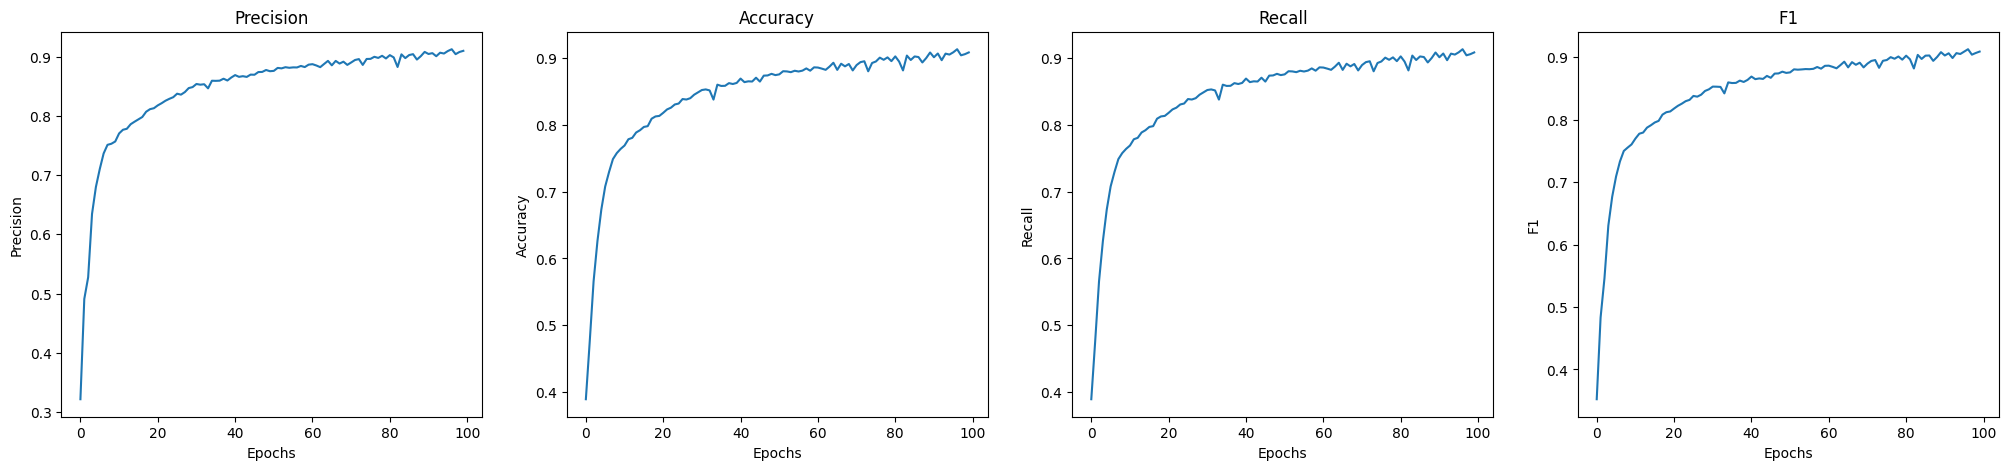

In [19]:
def plot_metrics(metrics, titles):
    # plot all the metrics in one plot

    fig, ax = plt.subplots(1, len(metrics), figsize=(25, 5))
    if len(metrics) == 1:
        ax = [ax]

    for i, metric in enumerate(metrics):
        ax[i].plot(metric)
        ax[i].set_title(titles[i])
        ax[i].set_xlabel("Epochs")
        ax[i].set_ylabel(titles[i])
    plt.show()

plot_metrics([precisions_, accuracies_, recalls_, f1s_], ["Precision", "Accuracy", "Recall", "F1"])

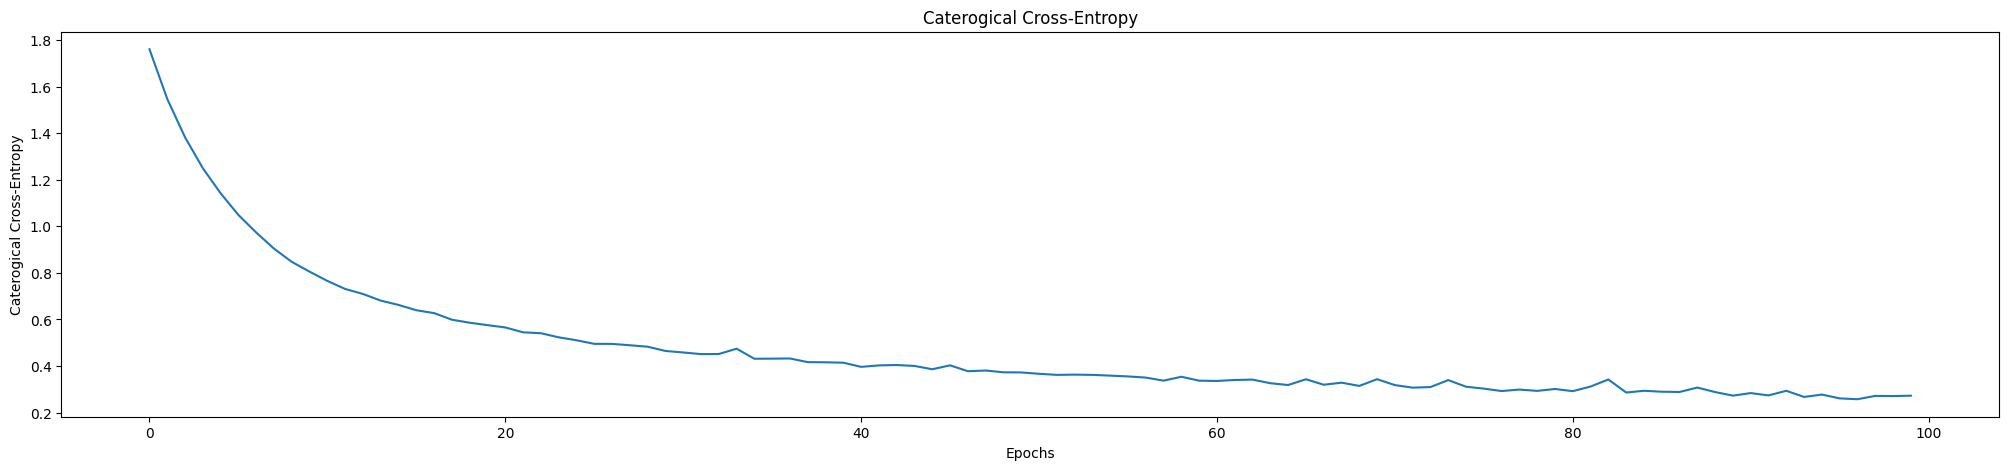

In [20]:
plot_metrics([losses_], ["Caterogical Cross-Entropy"])

In [21]:
prob_train = digits.predict(x_train)

# as this is not a binary classification, we need to use predict_classes and then accuracy
train_pred = Metrics.predict_classes(prob_train)
Metrics.accuracy(y_train, train_pred)

0.9081

In [22]:
prob_test = digits.predict(x_test)
test_pred = Metrics.predict_classes(prob_test)
print("Test Accuracy: ", Metrics.accuracy(y_test, test_pred))

Test Accuracy:  0.8


In [23]:
train_prec = Metrics.precision(y_train, train_pred, average="macro")
test_prec = Metrics.precision(y_test, test_pred, average="macro")

print(f"Training Precision: {train_prec:.4f}\nTesting Precision:  {test_prec:.4f}")

Training Precision: 0.9096
Testing Precision:  0.8200


In [29]:
Metrics.r2_score(y_train, train_pred)

0.8350909090909091

In [25]:
metrics.confusion_matrix(y_train, train_pred)

array([[905,   1,  10,  20,   0,   0,  57,   0,   7,   0],
       [  0, 985,   4,   5,   5,   0,   0,   1,   0,   0],
       [ 11,   3, 792,   4, 104,   0,  83,   0,   3,   0],
       [ 33,  15,   3, 888,  32,   0,  28,   0,   0,   1],
       [  1,   5,  38,   2, 882,   0,  71,   0,   1,   0],
       [  0,   0,   0,   0,   0, 986,   1,  11,   0,   2],
       [162,   4,  37,  11,  55,   0, 727,   0,   4,   0],
       [  0,   0,   0,   0,   0,  38,   0, 953,   0,   9],
       [  4,   0,   2,   0,   1,   0,   6,   0, 987,   0],
       [  0,   0,   0,   0,   0,   8,   0,  15,   1, 976]])

In [26]:
Metrics.confusion_matrix(y_train, train_pred)

Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,905,1,10,20,0,0,57,0,7,0
1,0,985,4,5,5,0,0,1,0,0
2,11,3,792,4,104,0,83,0,3,0
3,33,15,3,888,32,0,28,0,0,1
4,1,5,38,2,882,0,71,0,1,0
5,0,0,0,0,0,986,1,11,0,2
6,162,4,37,11,55,0,727,0,4,0
7,0,0,0,0,0,38,0,953,0,9
8,4,0,2,0,1,0,6,0,987,0


In [27]:
metrics.confusion_matrix(y_test, test_pred)

array([[3, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 6, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 3]])

In [28]:
Metrics.confusion_matrix(y_test, test_pred)

Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,3,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,1,0
3,1,0,0,3,0,0,0,0,0,0
4,0,0,0,0,6,0,1,0,0,0
5,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,2,0,0
8,0,1,0,0,0,0,0,0,3,0


***